# Task 2: Machine Learning

## Learning type of the problem
Investigate a suitable multi-class supervised learning image classifier <br/> algorithm with parameters to design a model to predict
<br/> the class category which an image belongs in the CIFAR-10 dataset
<br/> with as high as possible accuracy.

## Algorithm to solve the problem
- Random Forest

## Hyperparameter tuned to solve the problem
- n_estimators=200

### Importing important libraries

In [ ]:
# import CIFAR10 dataset
from tensorflow import keras
from keras.datasets import cifar10

# import standard, preprocessing and evaluation tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix


**Loading the CIFAR10 dataset**
<p>In this step, we are loading/downloading the dataset from Keras.
<br/> We are using the same data partitioning as the Deep Learning task.</p>
<p>The CIFAR10 dataset is prepared and ready for pre-processing.</p>

[https://keras.io/api/datasets/cifar10/](https://keras.io/api/datasets/cifar10/)
<br/> [https://www.cs.toronto.edu/~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
# The CIFAR-10 dataset contains 60000 32x32 colour images in 10 classes. 
# 6000 images per class. There are 50000 training images and 10000 test images.
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
#Display the shape of the datasets 
print("Training set size is: ", x_train.shape, y_train.shape)
print("Test set size is: ", x_test.shape, y_test.shape)

Training set size is:  (50000, 32, 32, 3) (50000, 1)
Test set size is:  (10000, 32, 32, 3) (10000, 1)


50,000 images for training and 10,000 images for testing

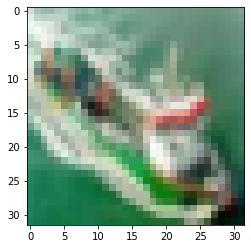

In [ ]:
# Preview image from test set, each image is a 32x32 colour image
plt.imshow(x_test[15])
plt.show()

In [ ]:
# Labels for classifiers
class_label = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Label for Matplotlib plot configuration
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Matplotlib plot configuration for image classification
plt.rc('image', cmap='gray')
plt.rc('grid', linewidth=0)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0')

# function to display a row of digits with their predictions
def plot_images(n, digits, predictions, labels, title):

  indexes = np.random.choice(len(predictions), size=n)
  n_digits = digits[indexes]
  n_predictions = predictions[indexes]
  n_predictions = n_predictions.reshape((n,))
  n_labels = labels[indexes]
 
  fig = plt.figure(figsize=(15, 3))
  plt.title(title)
  plt.yticks([])
  plt.xticks([])

  for i in range(n):
    ax = fig.add_subplot(1, n, i+1)
    class_index = n_predictions[i]
    
    plt.xlabel(classes[class_index])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(n_digits[i])

# function to display training and validation curves
def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name],color='blue',label=metric_name)
  plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

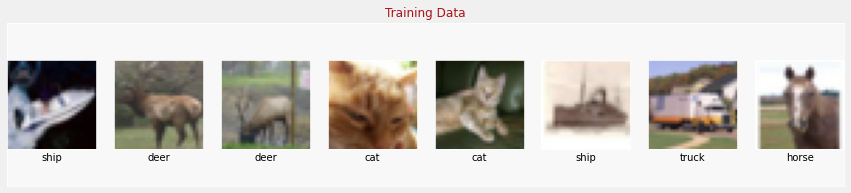

In [ ]:
plot_images(8, x_train, y_train, y_train, "Training Data" )

## 1.0 Data Pre-processing 

**Preparing the dataset for the machine learning algorithms**
<p>For pre-processing and modelling, scikit-learn machine learning tools are being used, <br/>this requires preparation for the data to be usable by sklearn functions and models.</p>

**Feature Extraction**
<p>Dimension reduction:
<br/>Reshape X data from 4D array to a 2D array. 
<br/>Reshape y data from 2D array to 1D array.</p>
<p>Normalisation:
<br/>Min-Max scaler
<br/>Divide by 255</p>

In [ ]:
# Data partitioning or other words normalisation 
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#Feature extracting to reduce the original shape which was a 4D array to 2D array
x_traina = x_train.reshape(50000,3072)
x_testa = x_test.reshape(10000,3072)

In [ ]:
#Feature extracting to reduce the original shape which was a 2D array to 1D array
y_traina = y_train.ravel()
y_testa = y_test.ravel() 

In [ ]:
# Verify 2D x_train and x_test size
# Verify 1D y_train and y_test size
print("Training set size is: ", x_traina.shape, y_traina.shape)
print("Test set size is: ", x_testa.shape, y_testa.shape)

Training set size is:  (50000, 3072) (50000,)
Test set size is:  (10000, 3072) (10000,)


In [ ]:
# preview of normalised data
print(x_traina[5])

[0.62352941 0.4        0.39607843 ... 0.71372549 0.22352941 0.0745098 ]


In [ ]:
#Splitting training dataset into training and validation data
x_trainb, x_valid, y_trainb, y_valid = train_test_split(x_traina, y_traina, test_size=0.2, stratify = y_traina, random_state=42)
print("Train set size is: ", x_trainb.shape, y_trainb.shape)
print("Validation set size is: ", x_valid.shape, y_valid.shape)

Train set size is:  (40000, 3072) (40000,)
Validation set size is:  (10000, 3072) (10000,)


## 2.0 Formulate the problem as a machine learning task.

<p>We have investigated four multi-class classifier algorithm with suitable <br/> parameters to design a model to predict the class category which <br/> an image belongs to, with as high as possible accuracy.</p>

*   Random Forest
*   Decision Tree
*   Gaussian Naive Bayes
*   KNN Nearest Neighbors

<p>The results are measured with accuracy metric and with a classification report.<br/>A confusion matrix is used to better visualise the results.</p>
<p>From the investigation, Random Forest Classifer has been selected and <br/>the hyperparameters to be optimised.</p>
<p>The parameter(s) are (n_estimators=200)</p>

## 3.0 Model Development

<p>Training and Testing with Random Forest Classifier.</p>
<p>Initial train and test set with default parameters.</p>
<p>Tuning hyperparameters with validation set and recorded</p>
<p>Updated parameters are applied to algorithm</p>
<p>Optimised train and test set with tuned parameters.</p>

# Implement Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a Random Forest model with all default parameters
model = RandomForestClassifier()

In [ ]:
# Train the model
model.fit(x_trainb,y_trainb)

RandomForestClassifier()

In [ ]:
# Testing the model
y_pred = model.predict(x_testa)
print (y_pred) 

[6 8 8 ... 3 5 7]


In [ ]:
# Random Forest Test results with default parameters
print("Random Forest Test Results:")
print("Test set Accuracy =", accuracy_score(y_pred, y_testa))
print("\nRandom Forest Test Results Report")
print(classification_report(y_pred, y_testa))

Random Forest Test Results:
Test set Accuracy = 0.4676

Random Forest Test Results Report
              precision    recall  f1-score   support

           0       0.57      0.54      0.55      1046
           1       0.55      0.53      0.54      1049
           2       0.31      0.36      0.34       873
           3       0.28      0.35      0.31       808
           4       0.39      0.41      0.40       940
           5       0.40      0.42      0.41       961
           6       0.58      0.47      0.52      1219
           7       0.45      0.50      0.48       890
           8       0.59      0.57      0.58      1036
           9       0.55      0.47      0.51      1178

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



In [ ]:
confusion_matrix(y_pred,y_testa)

array([[559,  34, 109,  50,  54,  42,  16,  49,  99,  54],
       [ 41, 532,  45,  50,  26,  36,  31,  40,  80, 160],
       [ 56,  26, 302,  71, 140,  94,  76,  52,  24,  20],
       [ 22,  33,  72, 267,  56, 167,  65,  63,  27,  27],
       [ 28,  19, 167,  92, 390,  70, 101, 108,  25,  19],
       [ 18,  30,  74, 170,  43, 378,  55,  87,  35,  21],
       [ 19,  41, 114, 140, 154,  83, 575,  47,  10,  28],
       [ 27,  33,  60,  66,  89,  74,  31, 446,  22,  44],
       [169,  56,  26,  23,  23,  25,  10,  24, 592,  87],
       [ 61, 196,  31,  71,  25,  31,  40,  84,  86, 540]])

In [ ]:
plot_confusion_matrix(model, x_testa, y_test)  
plt.title('Confusion Matrix for Random Forest Classifer')
plt.show()

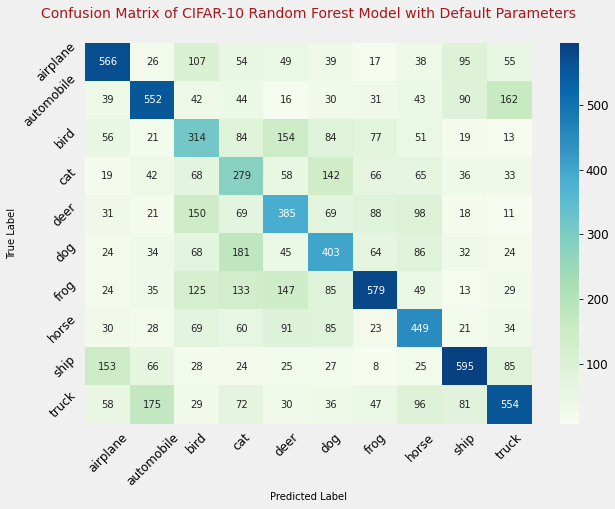

In [ ]:
# create a heatmap of confution matrix of Random Forest model with default parameters
plt.subplots(figsize=(10,7))
plt.title("Confusion Matrix of CIFAR-10 Random Forest Model with Default Parameters", y=1.05, fontsize = 14)
sns.heatmap(confusion_matrix(y_pred, y_testa), fmt="d",cmap='GnBu',annot = True)
plt.xticks(class_label, labels, rotation=45)
plt.yticks(class_label, labels, rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Hyperparameter tuning

In [ ]:
from pprint import pprint

# examine the default parameters used in the above model
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# One parameter is selected to be optimised
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [150, 200]}

# Create a base model
RF = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [ ]:
# Fit the data to grid search CV
grid_search.fit(x_valid,y_valid);

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [ ]:
# display the best value of n_estimators
grid_search.best_params_

{'n_estimators': 200}

In [ ]:
# Create a second Random Forest model with the tune hyperparameter n_estimators as 200
rf_model = RandomForestClassifier(n_estimators=200)

# Train the model
rf_model.fit(x_trainb,y_trainb)

RandomForestClassifier(n_estimators=200)

In [ ]:
# Testing the model
y_pred_rf = rf_model.predict(x_testa)
print (y_pred_rf) 

[6 8 8 ... 3 5 7]


In [ ]:
# Random Forest Test results with tuned parameter n_estimators = 200
model_score = accuracy_score(y_pred_rf, y_testa)
print("Random Forest Test Results:")
print("Test set Accuracy =", model_score)
print("\nRandom Forest Test Results Report")
print(classification_report(y_pred_rf, y_testa))

Random Forest Test Results:
Test set Accuracy = 0.4682

Random Forest Test Results Report
              precision    recall  f1-score   support

           0       0.56      0.55      0.55      1023
           1       0.55      0.54      0.54      1026
           2       0.31      0.37      0.34       837
           3       0.27      0.35      0.30       764
           4       0.39      0.38      0.38      1001
           5       0.39      0.42      0.41       928
           6       0.58      0.47      0.52      1246
           7       0.46      0.51      0.49       908
           8       0.61      0.57      0.59      1073
           9       0.56      0.47      0.51      1194

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



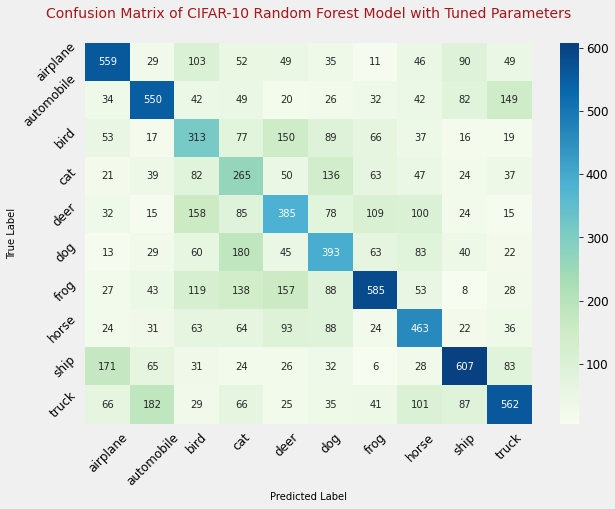

In [ ]:
# create a heatmap of confution matrix of Random Forest model with n_estimators = 200
plt.subplots(figsize=(10,7))
plt.title("Confusion Matrix of CIFAR-10 Random Forest Model with Tuned Parameters", y=1.05, fontsize = 14)
sns.heatmap(confusion_matrix(y_pred_rf, y_testa), fmt="d",cmap='GnBu',annot = True)
plt.xticks(class_label, labels, rotation=45)
plt.yticks(class_label, labels, rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<p>With default parameters, Random Forest has a 46.81 (47%) accuracy
<br/>With tuned parameters, Random Forest has a 48.03 (48%) accuracy  
</p>

# 4.0 Additional Analysis

## Implement Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2=DecisionTreeClassifier()
model2.fit(x_trainb,y_trainb)
y_pred_model2=model2.predict(x_testa)
y_pred_model2

array([6, 8, 8, ..., 9, 4, 7], dtype=uint8)

In [ ]:
model2_score = accuracy_score(y_pred_model2,y_testa)
print("Decision Tree Test Results:")
print("Test set Accuracy =", model2_score)
print("\nDecision Tree Test Results Report")
print(classification_report(y_pred_model2,y_testa))

Decision Tree Test Results:
Test set Accuracy = 0.2667

Decision Tree Test Results Report
              precision    recall  f1-score   support

           0       0.37      0.36      0.36      1039
           1       0.29      0.30      0.29       988
           2       0.22      0.20      0.21      1112
           3       0.18      0.17      0.17      1068
           4       0.21      0.22      0.21       958
           5       0.22      0.23      0.22       972
           6       0.27      0.27      0.27       983
           7       0.25      0.26      0.25       953
           8       0.38      0.38      0.38       994
           9       0.29      0.31      0.30       933

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



In [ ]:
confusion_matrix(y_pred_model2,y_testa)

array([[371,  74,  89,  69,  65,  59,  38,  59, 143,  72],
       [ 59, 292,  48,  66,  50,  58,  65,  67, 106, 177],
       [109,  65, 222, 130, 167, 107, 118,  96,  44,  54],
       [ 69,  73, 114, 178, 114, 140, 138,  97,  69,  76],
       [ 56,  44, 115, 100, 206,  97, 130, 123,  47,  40],
       [ 43,  67, 112, 146,  83, 219,  95, 107,  46,  54],
       [ 30,  63, 100, 120, 143,  91, 266,  82,  32,  56],
       [ 59,  72,  91,  78,  99, 110,  68, 248,  49,  79],
       [148,  95,  53,  48,  42,  45,  40,  46, 375, 102],
       [ 56, 155,  56,  65,  31,  74,  42,  75,  89, 290]])

In [ ]:
plot_confusion_matrix(model2, x_testa, y_testa)  
plt.title('Confusion Matrix for Decision Tree Classifer')
plt.show()

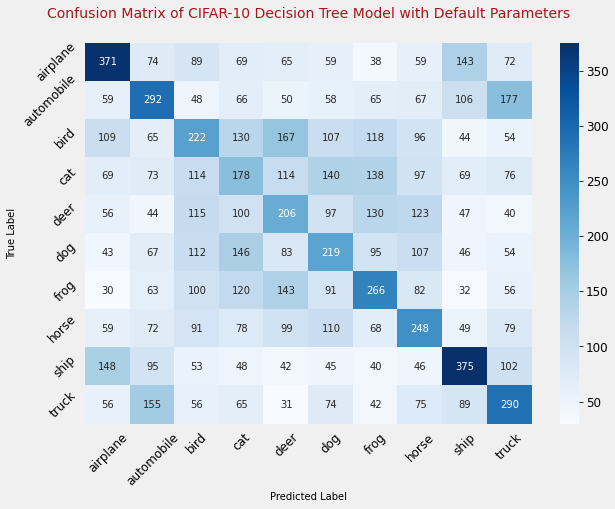

In [ ]:
# create a heatmap of confution matrix of Decision Tree model with default parameters
plt.subplots(figsize=(10,7))
plt.title("Confusion Matrix of CIFAR-10 Decision Tree Model with Default Parameters", y=1.05, fontsize = 14)
sns.heatmap(confusion_matrix(y_pred_model2, y_testa), fmt="d",cmap='Blues',annot = True)
plt.xticks(class_label, labels, rotation=45)
plt.yticks(class_label, labels, rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Implement Naive Bayes Classifer 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model3=GaussianNB()
model3.fit(x_trainb,y_trainb)
y_pred_model3=model3.predict(x_testa)
y_pred_model3

array([6, 8, 8, ..., 6, 5, 4], dtype=uint8)

In [ ]:
model3_score = accuracy_score(y_pred_model3,y_testa)
print("GaussianNB Test Results:")
print("Test set Accuracy =", model3_score)
print("\nGaussianNB Test Results Report")
print(classification_report(y_pred_model3,y_testa))

GaussianNB Test Results:
Test set Accuracy = 0.2951

GaussianNB Test Results Report
              precision    recall  f1-score   support

           0       0.49      0.27      0.35      1812
           1       0.16      0.40      0.23       408
           2       0.07      0.17      0.10       434
           3       0.08      0.25      0.12       326
           4       0.40      0.24      0.30      1715
           5       0.26      0.32      0.29       816
           6       0.47      0.25      0.33      1881
           7       0.13      0.42      0.20       316
           8       0.47      0.38      0.42      1227
           9       0.40      0.38      0.39      1065

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.27     10000
weighted avg       0.39      0.30      0.32     10000



In [ ]:
confusion_matrix(y_pred_model3,y_testa)

array([[494, 140, 225, 161,  87, 156, 105, 131, 170, 143],
       [ 20, 163,  24,  37,   8,  19,   3,  24,  43,  67],
       [ 37,  23,  74,  54,  57,  56,  61,  39,  16,  17],
       [ 10,  33,  17,  80,  29,  54,  18,  45,  18,  22],
       [ 84,  65, 296, 150, 404, 165, 222, 223,  58,  48],
       [ 34,  70,  47, 125,  36, 259,  45,  91,  80,  29],
       [ 53, 197, 213, 263, 276, 160, 471, 104,  40, 104],
       [  9,  20,  22,  26,  22,  35,  15, 133,   9,  25],
       [199, 122,  54,  35,  49,  59,  21,  74, 471, 143],
       [ 60, 167,  28,  69,  32,  37,  39, 136,  95, 402]])

In [ ]:
plot_confusion_matrix(model3, x_testa, y_testa)  
plt.title('Confusion Matrix for Naive Bayes Classifer')
plt.show()

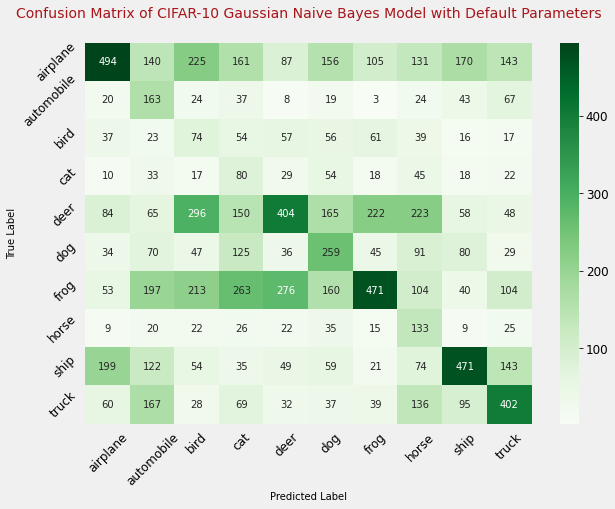

In [ ]:
# create a heatmap of confusion matrix of Gaussian Naive Bayes with default parameters
plt.subplots(figsize=(10,7))
plt.title("Confusion Matrix of CIFAR-10 Gaussian Naive Bayes Model with Default Parameters", y=1.05, fontsize = 14)
sns.heatmap(confusion_matrix(y_pred_model3, y_testa), fmt="d",cmap='Greens',annot = True)
plt.xticks(class_label, labels, rotation=45)
plt.yticks(class_label, labels, rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Implement KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#k value is 4 from parameter tuning with GridSearchCV
model4 = KNeighborsClassifier(n_neighbors=4)
model4.fit(x_trainb,y_trainb)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred_model4 = model4.predict(x_testa)
y_pred_model4

array([2, 8, 8, ..., 5, 3, 4], dtype=uint8)

In [ ]:
model4_score = accuracy_score(y_pred_model4, y_testa)
print("KNN Test Results:")
print("Test set Accuracy =", model4_score)
print("\nKNN Test Results Report")
print(classification_report(y_pred_model4, y_testa))

KNN Test Results:
Test set Accuracy = 0.3296

KNN Test Results Report
              precision    recall  f1-score   support

           0       0.58      0.34      0.43      1692
           1       0.22      0.63      0.33       345
           2       0.43      0.21      0.28      2033
           3       0.19      0.25      0.22       765
           4       0.46      0.24      0.32      1908
           5       0.21      0.43      0.28       495
           6       0.25      0.34      0.29       748
           7       0.20      0.72      0.31       281
           8       0.62      0.40      0.49      1542
           9       0.13      0.70      0.23       191

    accuracy                           0.33     10000
   macro avg       0.33      0.43      0.32     10000
weighted avg       0.43      0.33      0.34     10000



In [ ]:
confusion_matrix(y_pred_model4,y_testa)

array([[576, 165, 139, 108,  94,  72,  46, 107, 192, 193],
       [  7, 219,   6,  11,   3,   4,   3,   8,  14,  70],
       [ 89, 119, 429, 241, 261, 240, 285, 191,  50, 128],
       [ 17,  49,  52, 193,  39, 166,  75,  61,  43,  70],
       [ 54, 136, 212, 177, 463, 168, 281, 263,  51, 103],
       [  6,  22,  34,  95,  22, 212,  26,  54,   9,  15],
       [ 35,  53,  62, 107,  58,  77, 252,  48,  12,  44],
       [  6,   5,  10,  18,  11,  12,   2, 201,   3,  13],
       [205, 213,  51,  45,  47,  44,  28,  62, 617, 230],
       [  5,  19,   5,   5,   2,   5,   2,   5,   9, 134]])

In [ ]:
plot_confusion_matrix(model4, x_testa, y_testa)  
plt.title('Confusion Matrix for KNN')
plt.show()

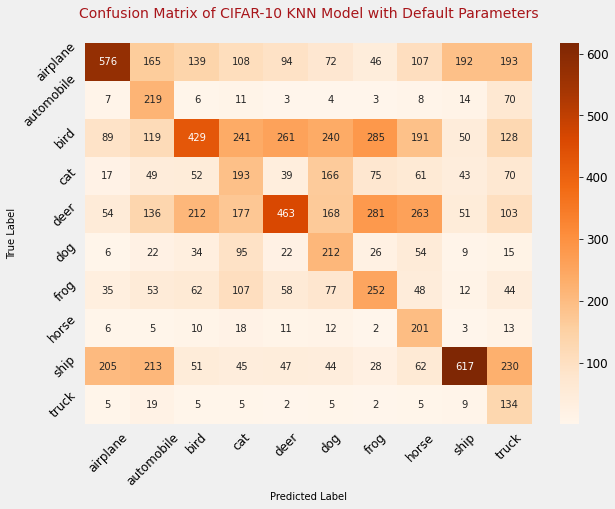

In [ ]:
# create a heatmap of confution matrix of KNN with default parameters
plt.subplots(figsize=(10,7))
plt.title("Confusion Matrix of CIFAR-10 KNN Model with Default Parameters", y=1.05, fontsize = 14)
sns.heatmap(confusion_matrix(y_pred_model4, y_testa), fmt="d",cmap='Oranges',annot = True)
plt.xticks(class_label, labels, rotation=45)
plt.yticks(class_label, labels, rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# KNN Hyperparameters tuning with GridSearchCV
n_neighbors = list(range(2,10))

# Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)

# New KNN object
knn_2 = KNeighborsClassifier()

# Use GridSearchCV
knn_clf = GridSearchCV(knn_2, hyperparameters, cv=5, scoring='accuracy')

# Fit the model, using train set takes about 20+ minutes
knn_best_model = knn_clf.fit(x_valid, y_valid)

# Value of better hyperparameter
print('Best n_neighbors:', knn_best_model.best_params_)

Best n_neighbors: {'n_neighbors': 9}


# 5.0 Performance Assessment

# Evaluation of the 4 models 

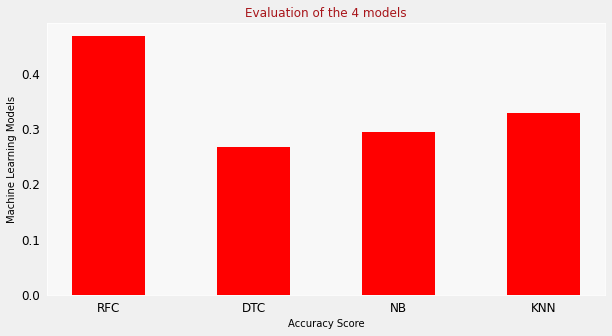

In [ ]:
#Setting all the models' accuracy score in a list
data = {'RFC':model_score, 'DTC': model2_score, 'NB': model3_score, 'KNN':model4_score}

#Plotting a bar graph to show the performance/accuracy score on all four models for evaluation 
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='red', width = 0.5)
plt.xlabel("Accuracy Score")
plt.ylabel("Machine Learning Models")
plt.title("Evaluation of the 4 models")
plt.show()

<p>With default parameters, Random Forest has a 46.81 (47%) accuracy
<br/>With tuned parameters, Random Forest has a 48.03 (48%) accuracy  
</p>

Random Forest Classifer has the highest accuracy score of 48%

# Testing on Random Forest Classifer 

Uploaded pictures of a cat, bird and dog (source: Google image) and resize them to 32 x 32. Once it is resized, dimension was changed to 2D. 

In [ ]:
from skimage.transform import resize
from skimage.io import imread, imshow

To access image file upload the image to /content/sample_data/
<br/>This can be accessed from the folder icon on the sidebar
<br/> <----------

Image preparation

In [ ]:
#getting the image from the sample_data file 
path = '/content/sample_data/cat.jpeg'
cat_image = plt.imread(path)

#resizing the image to 32 x 32
resize_cat_image = resize(cat_image,(32,32))

#Feature extracting to reduce the dimension to 2D
nx, ny, nrgb = resize_cat_image.shape
finalise_cat_image = resize_cat_image.reshape(1,(nx*ny*nrgb))

#Declaring all the classes/objects in the dataset
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
#Same process but with a different image
path = '/content/sample_data/bird.jpeg'
bird_image = plt.imread(path)
resize_bird_image = resize(bird_image,(32,32))

nx, ny, nrgb = resize_bird_image.shape
finalise_bird_image = resize_bird_image.reshape(1,(nx*ny*nrgb))

In [ ]:
#Same process but with a different image
path = '/content/sample_data/dog.jpeg'
dog_image = plt.imread(path)
resize_dog_image = resize(dog_image,(32,32))

nx, ny, nrgb = resize_dog_image.shape
finalise_dog_image = resize_dog_image.reshape(1,(nx*ny*nrgb))

Image Classification Test

In [ ]:
#Testing it on the RFC model 
# Accuracy of 48.03 (48%)
result=rf_model.predict(finalise_cat_image)
print('Expected result: cat')
print(classes[result[0]])

result2=rf_model.predict(finalise_bird_image)
print('\nExpected result: bird')
print(classes[result2[0]])

result3=model.predict(finalise_dog_image)
print('\nExpected result: dog')
print(classes[result3[0]])

Expected result: cat
dog

Expected result: bird
bird

Expected result: dog
deer


In [ ]:
#testing on KNN model (the second highest performance score)
# Accuracy of 33.98 (34%)
result4=model4.predict(finalise_cat_image)
print('Expected result: cat')
print(classes[result4[0]])

result4=model4.predict(finalise_bird_image)
print('\nExpected result: bird')
print(classes[result4[0]])

result4=model4.predict(finalise_dog_image)
print('\nExpected result: dog')
print(classes[result4[0]])

Expected result: cat
bird

Expected result: bird
deer

Expected result: dog
cat


CIFAR-10 Random Forest Prediction result sample

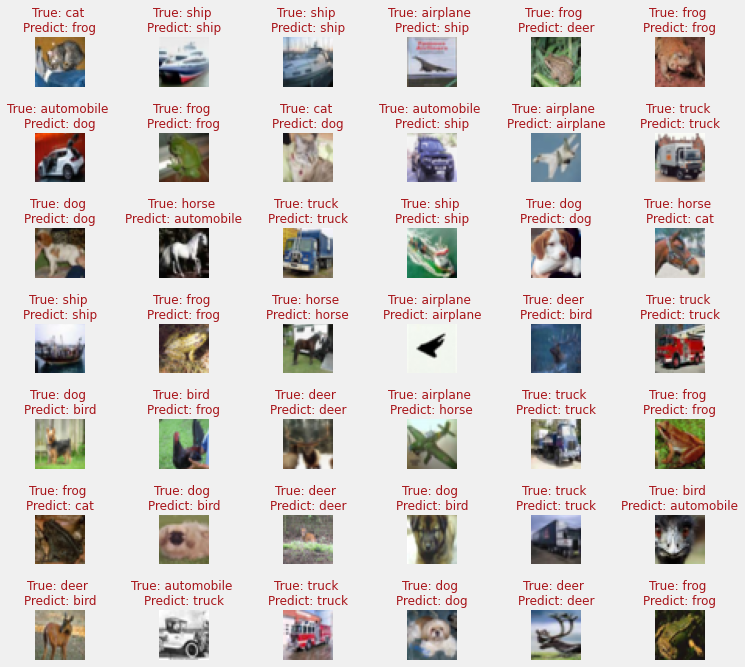

In [ ]:
#Check predictions
R = 7
C = 6
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[y_testa[i]], labels[y_pred_rf[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1.5)

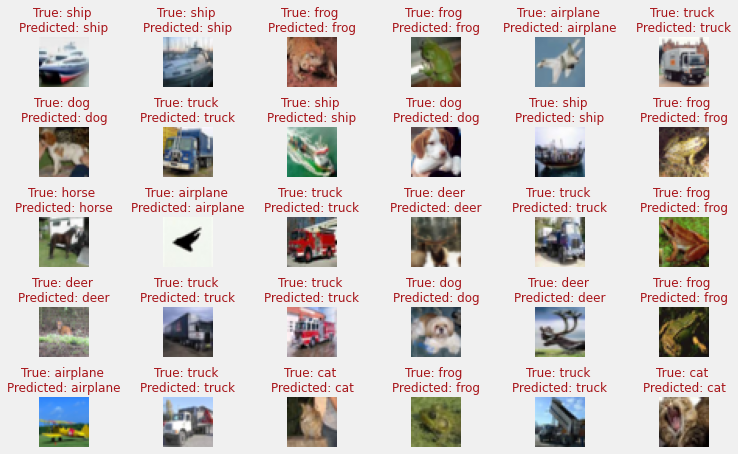

In [ ]:
# Check correct predictions
R = 5
C = 6
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(y_pred_rf == y_testa)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_testa[misclassified_idx[i]]], 
                                                  labels[y_pred_rf[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1.5)

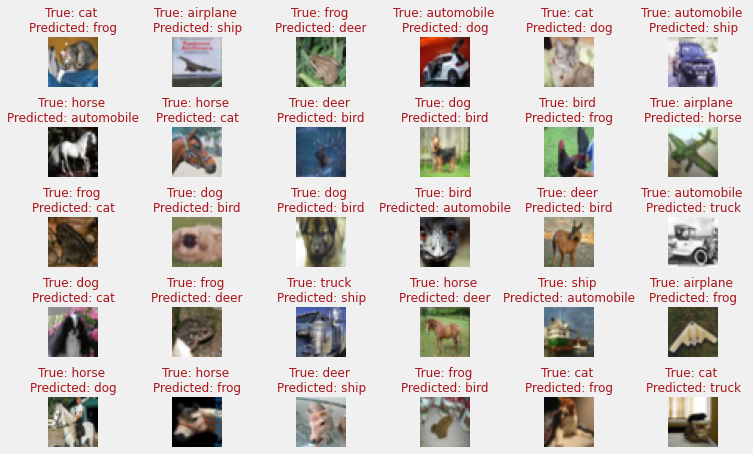

In [ ]:
# Check incorrect predictions
R = 5
C = 6
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(y_pred_rf != y_testa)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_testa[misclassified_idx[i]]], 
                                                  labels[y_pred_rf[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1.5)

##Please refer to the appendix for Task 3

## References
Koehrsen, W 2018, 'Hyperparameter Tuning the Random Forest in Python', *Medium*, 10 Jan, viewed 03 May 2022, <https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74>.

Nithyashree, V 2022, Image Classification using Machine Learning, Analytic Vidhya, viewed 01 June 2022 <https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/#h2_3>